# Salary Predication using  Simple Linear Regression model

# Importing the Libraries
# Importing Dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Salary predication dataset available on Kaggle
os.chdir("E://Python")

In [3]:
#import dataset
sd=pd.read_csv("Salary_Data.csv")

In [4]:
#getting basic information on dataset - 1
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
#getting basic information on dataset - 2
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Classifying dependent and independent variables.

In [10]:
#preparing X and Y for model building
X = sd.iloc[:,: 1].values
y = sd.iloc[:,-1].values

In [7]:
print(X.shape)
print(y.shape)

(30, 1)
(30,)


Text(0.5, 1.0, 'Experience vs Salary')

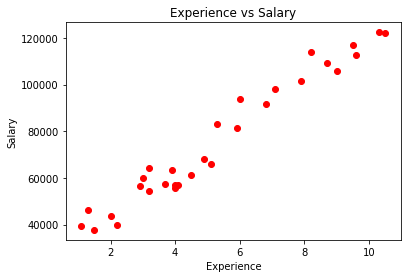

In [11]:
#Checking the linear relationship between X and Y using scatter plot
colors = ('r')
plt.scatter(X,y,c=colors)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")

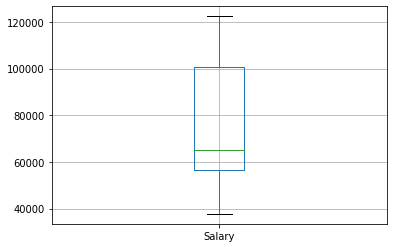

In [41]:
#Checking for Outliers
sd.boxplot(column='Salary')

# Comparing - Normal (Salary) Vs Log Transformation (Salary) Variable

In [74]:
#Creating a new target column to comparison
target = sd['Salary']
target.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

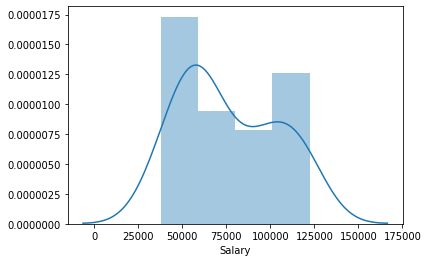

In [13]:
import seaborn as sns
sns.distplot(target,hist=True)

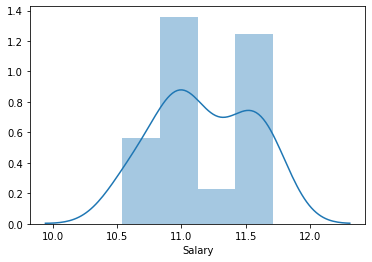

In [43]:
#Creating a new target column(Log Transformation) to comparison
target_log = np.log(target)
sns.distplot(target_log,hist=True)

# Preparing Simple LinerRegression Model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
#creating Train & Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
#Assigning Linear Model to new name
lr = LinearRegression()

In [46]:
#Fitting linear Regression in Train model
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#Creating Y_Predication using Linear model with X_test
y_pred = lr.predict(X_test)

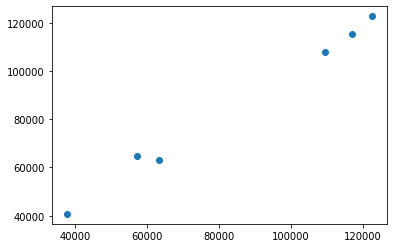

In [59]:
plt.scatter(y_test,y_pred)

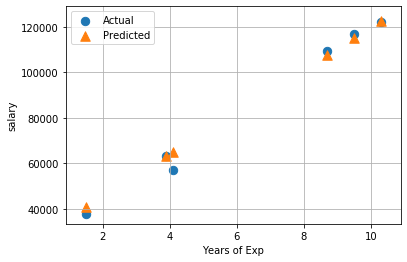

In [60]:
#Creating scatter plot to view the Actual Vs Predicted
plt.scatter(X_test,y_test, s=70, label='Actual')
plt.scatter(X_test,y_pred,s=90,marker='^',label='Predicted')
plt.xlabel('Years of Exp')
plt.ylabel('salary')
plt.legend();
plt.grid()
plt.show()

# Metrics calculations using manual & library

In [61]:
#Viewing the Coeffecient & Intercept value
print(lr.coef_,lr.intercept_)

[9312.57512673] 26780.099150628186


In [62]:
lr.score(X_train,y_train)

0.9411949620562126

In [64]:
#importing Metrics from Sklearn library
from sklearn import metrics
Rsquare = metrics.r2_score(y_test,y_pred)
Rsquare

0.988169515729126

In [65]:
#Calculating RMSE value manually
actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [66]:
actual_vs_pred

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


In [67]:
#getting residual/error value
error = [actual_vs_pred['Actual'] - actual_vs_pred['Predicted']]

In [68]:
#converting into DataFrame
error = pd.DataFrame(error)

In [69]:
error = error.T

In [72]:
#Calculating RMSE value
rmse = np.sqrt(np.sum(error**2)/len(error))
rmse

0    3580.979237
dtype: float64

In [73]:
#Calculating RMSE using Metrics library from Sklearn
print('Mean ABSOLUTE ERROR  =  ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean SQUARED ERROR   =  ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean SQUARED ERROR   =  ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean ABSOLUTE ERROR  =   2446.1723690465064
Mean SQUARED ERROR   =   12823412.298126562
Root Mean SQUARED ERROR   =   3580.979237321345


# Getting Stats test calculations using Scipy library

In [37]:
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import kstest

In [38]:
anderson(sd['Salary'])

AndersonResult(statistic=1.001731867938858, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [39]:
shapiro(sd['Salary'])

(0.9103153944015503, 0.015155534259974957)

In [40]:
kstest(sd['Salary'],'norm')

KstestResult(statistic=1.0, pvalue=0.0)

# Crosschecking with OLS method

In [55]:
import statsmodels.api as sm
model_sum = sm.OLS(y_train,X_train).fit()

In [56]:
model_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              734.3
Date:                Thu, 30 Apr 2020   Prob (F-statistic):                    5.90e-19
Time:                        19:07:37   Log-Likelihood:                         -262.45
No. Observations:                  24   AIC:                                      526.9
Df Residuals:                      23   BIC:                                      528.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.351e+04    498.635     27.098      0.000    1.25e+04    1.45e+04
==============================================================================
Omnibus:                        0.334   Durbin-Watson:                   2.296
Prob(Omnibus):                  0.846   Jarque-Bera (JB):                0.390
Skew:                          -0.242   Prob(JB):                        0.823
Kurtosis:                       2.605   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""